In [1]:
import random, numpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

random.seed(30)

In [2]:

max = 1
min = 0.3
desired = 800
step = float(max - min) / desired
window = 0.5
numbers_1 = [x - (random.random() * window ) + (window / 2.0) for x in numpy.arange(min,max, step)]

'''
numbers_1 = [random.random() for _ in range(800)]
'''

'\nnumbers_1 = [random.random() for _ in range(800)]\n'

In [3]:
numbers_1

[0.2804592176970947,
 0.40627677818013974,
 0.5367315457244365,
 0.2258071230536191,
 0.4484956522251345,
 0.42573651251019545,
 0.35665086868338636,
 0.23533592311266371,
 0.06259439479813939,
 0.3271084949686876,
 0.06200749619916579,
 0.06333900292068623,
 0.43916223221327855,
 0.5250524435643296,
 0.4822994888851912,
 0.14217363426052237,
 0.264222635526866,
 0.10614366757207011,
 0.0796654462818644,
 0.2394130897060021,
 0.2998976088983198,
 0.5345594842083329,
 0.5574949684716096,
 0.1674778565361435,
 0.23501514306738952,
 0.19036912907353293,
 0.28992376598906994,
 0.23667812038052943,
 0.2551385905955582,
 0.12778717475395052,
 0.5203749906515203,
 0.3298997901762053,
 0.4234029741535144,
 0.16420253844327243,
 0.14121150711281494,
 0.45460991610960294,
 0.5413287599595712,
 0.46076318617394846,
 0.42594249767615033,
 0.19930748532435233,
 0.3801368990674551,
 0.21092518895200024,
 0.43627265329997805,
 0.3257537565713285,
 0.4953156574963636,
 0.26668284665330105,
 0.33369756

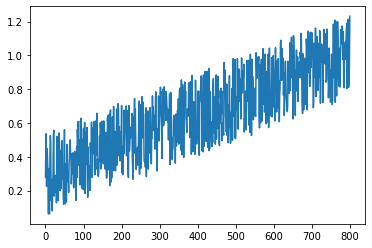

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline 

plt.plot(numbers_1)
plt.show()


In [5]:
max = 5.0
min = 1
desired = 500
step = float(max - min) / desired
window = 0.5
numbers_2 = [x - (random.random() * window) + (window / 2.0) for x in numpy.arange(min,max, step)]

In [6]:
numbers_2

[1.2089273796346869,
 0.9888090618778007,
 0.8269498878865624,
 0.9263073286311913,
 1.118741146043892,
 1.1555309846450519,
 1.0392425322759156,
 1.0608324108271106,
 1.2640297796542905,
 0.9958143539994422,
 1.2978561958425776,
 0.8743715927700968,
 1.0708306411493258,
 1.2467236865692355,
 1.0580745992371061,
 1.0835380697123922,
 1.2824538629717317,
 0.9313220143581002,
 1.05366773924662,
 1.3089235384727216,
 1.1265418207980389,
 1.0589622757136399,
 1.409363299973268,
 1.4261116718203126,
 0.9570956987617643,
 1.2717005340732812,
 1.415911600253323,
 1.1950275557616077,
 1.399690430800268,
 0.9847822339286164,
 1.038644918594813,
 1.4403976667229772,
 1.4135786287070187,
 1.2089061123448062,
 1.094158118888991,
 1.1046922883689922,
 1.0937542559441131,
 1.228778542394847,
 1.4877646335938688,
 1.185341678990277,
 1.5174954609923546,
 1.2360988734106657,
 1.1967480978224994,
 1.4001643909577848,
 1.4439018925017315,
 1.3466391947837681,
 1.2928270580403374,
 1.4660484419452613,
 1

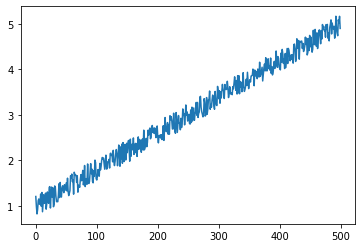

In [7]:
plt.plot(numbers_2)
plt.show()

In [8]:
vib = np.concatenate((numbers_1, numbers_2), axis = 0)

In [9]:
vib

array([0.28045922, 0.40627678, 0.53673155, ..., 5.01766001, 5.16311724,
       4.89698744])

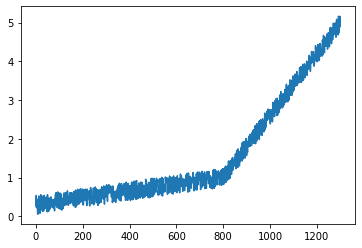

In [10]:
plt.plot(vib)
plt.show()

In [11]:
def savitzky_golay(y, window_size, order, deriv=0, rate=1):

    import numpy as np
    from math import factorial

    try:
        window_size = np.abs(np.int(window_size))
        order = np.abs(np.int(order))
    except ValueError as msg:
        raise ValueError("window_size and order have to be of type int")
    if window_size % 2 != 1 or window_size < 1:
        raise TypeError("window_size size must be a positive odd number")
    if window_size < order + 2:
        raise TypeError("window_size is too small for the polynomials order")
    order_range = range(order+1)
    half_window = (window_size -1) // 2
    # precompute coefficients
    b = np.mat([[k**i for i in order_range] for k in range(-half_window, half_window+1)])
    m = np.linalg.pinv(b).A[deriv] * rate**deriv * factorial(deriv)
    # pad the signal at the extremes with
    # values taken from the signal itself
    firstvals = y[0] - np.abs( y[1:half_window+1][::-1] - y[0] )
    lastvals = y[-1] + np.abs(y[-half_window-1:-1][::-1] - y[-1])
    y = np.concatenate((firstvals, y, lastvals))
    return np.convolve( m[::-1], y, mode='valid')

In [12]:
vib = savitzky_golay(vib,51,3)

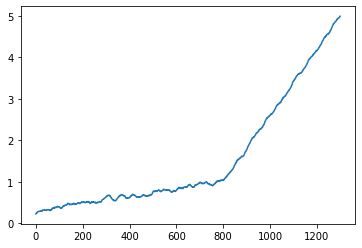

In [13]:
plt.plot(vib)
plt.show()

In [14]:
vib

array([0.22600985, 0.23345156, 0.24398277, ..., 4.97143123, 4.97788622,
       4.98605089])

In [15]:
vib.shape

(1300,)

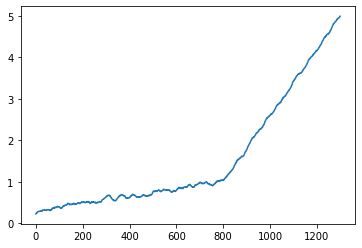

In [16]:
plt.plot(vib)
plt.show()

In [17]:
dataset = pd.DataFrame({'vib': vib[:]})

In [18]:
dataset

,vib
0,0.226010
1,0.233452
2,0.243983
3,0.252007
4,0.257977
...,...
1295,4.951119
1296,4.963732
1297,4.971431
1298,4.977886


In [19]:
dataset.shape

(1300, 1)

In [20]:
print(dataset.loc[0][0])

0.22600984799772153


In [21]:
n=5 # number of points to be checked before and after 
# Find local peaks
dataset['min'] = dataset.iloc[argrelextrema(dataset.vib.values, np.less_equal, order=n)[0]]['vib']
dataset['max'] = dataset.iloc[argrelextrema(dataset.vib.values, np.greater_equal, order=n)[0]]['vib']

# Plot results
plt.scatter(dataset.index, dataset['min'], c='r')
plt.scatter(dataset.index, dataset['max'], c='g')
plt.plot(dataset.index, dataset['vib'])
plt.show()

NameError: name 'argrelextrema' is not defined

In [22]:
dataset['min'].min()

KeyError: 'min'

In [23]:
n = len(dataset)

In [24]:
sum_vib = 0

sum_kurt_m = []
sum_kurt_m_2 =[]

kurtosis = []


for i in range(1,n+1):
    sum_vib = sum_vib + dataset.loc[i-1][0]
    mean = sum_vib / i
    
    kurt_m = pow((dataset.loc[i-1][0] - mean), 4)
    sum_kurt_m.append(kurt_m)
    kurt_nume = np.cumsum(sum_kurt_m)/i
    #print(kurt_nume[i-1])
    
    kurt_m_2 = pow((dataset.loc[i-1][0] - mean), 2)
    sum_kurt_m_2.append(kurt_m_2)
    kurt_deno = pow(np.cumsum(sum_kurt_m_2)/i,2)
    #print(kurt_deno[i-1])
    
    kurtosis_i = kurt_nume[i-1] / kurt_deno[i-1]
    kurtosis.append(kurtosis_i)
    #print(kurtosis)

/home/seungmoo/env-ysm/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars


In [25]:
kurtosis = np.array(kurtosis[1:])
kurtosis

array([2.        , 2.30827453, 1.99253554, ..., 3.93406385, 3.93010998,
       3.92617069])

In [26]:
kurtosis[0:]

array([2.        , 2.30827453, 1.99253554, ..., 3.93406385, 3.93010998,
       3.92617069])

In [27]:
kurtosis = pd.DataFrame({'kurtosis': kurtosis[0:]})
kurtosis.head()

,kurtosis
0,2.000000
1,2.308275
2,1.992536
3,1.780183
4,1.755949


In [28]:
#kurtosis["kurtosis"].plot()
#plt.show()

In [29]:
sum_kurt = 0
ku_range = []
kl_range = []

for i in range(1, len(kurtosis)+1):
    sum_kurt = sum_kurt + kurtosis.loc[i-1][0]
    k_mean = sum_kurt / i
    k_std = np.sqrt(pow((kurtosis.loc[i-1][0] - k_mean) , 2) / i)
    u_range = k_mean + 3*k_std
    l_range = k_mean - 3*k_std
    
    ku_range.append(u_range)
    kl_range.append(l_range)
    
    #print(kurtosis.loc[i-1][0], k_mean, k_std, u_range, l_range)
   # print(kurtosis.loc[i-1][0], sum_kurt, kurt_mean, kurt_std )

In [30]:
ku_range = np.array(ku_range)
kl_range = np.array(kl_range)

In [31]:
ku_range

array([2.        , 2.48111179, 2.28687162, ..., 2.94957039, 2.94996239,
       2.95035201])

In [32]:
df_std = pd.DataFrame({'ku_range': ku_range[:], 'kl_range': kl_range[:]})
df_std

,ku_range,kl_range
0,2.000000,2.000000
1,2.481112,1.827163
2,2.286872,1.913668
3,2.380347,1.660150
4,2.251064,1.683713
...,...,...
1294,2.948774,2.768120
1295,2.949174,2.769386
1296,2.949570,2.770647
1297,2.949962,2.771904


In [33]:
kurtosis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299 entries, 0 to 1298
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   kurtosis  1299 non-null   float64
dtypes: float64(1)
memory usage: 10.3 KB


In [34]:
df_std.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299 entries, 0 to 1298
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ku_range  1299 non-null   float64
 1   kl_range  1299 non-null   float64
dtypes: float64(2)
memory usage: 20.4 KB


In [35]:
kurtosis_df = pd.concat([kurtosis, df_std], axis = 1)
kurtosis_df

,kurtosis,ku_range,kl_range
0,2.000000,2.000000,2.000000
1,2.308275,2.481112,1.827163
2,1.992536,2.286872,1.913668
3,1.780183,2.380347,1.660150
4,1.755949,2.251064,1.683713
...,...,...,...
1294,3.941957,2.948774,2.768120
1295,3.938007,2.949174,2.769386
1296,3.934064,2.949570,2.770647
1297,3.930110,2.949962,2.771904


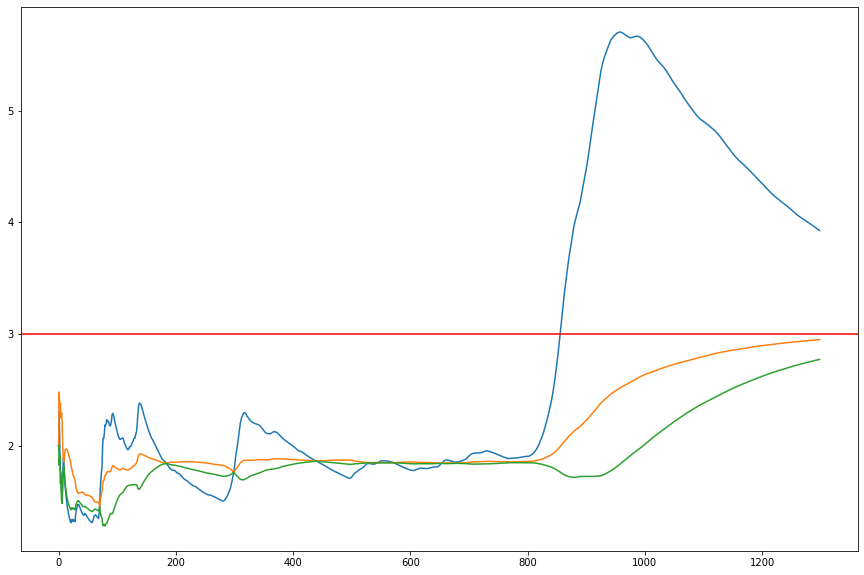

In [36]:
plt.rcParams["figure.figsize"] = (15,10)

for col in kurtosis_df:
    plt.plot(kurtosis_df[col])
    
#plt.legend(loc='upper right', fancybox=True, ncol=100, labels=['Actual', 'Predited'])    
plt.axhline(y = 3, color = 'r', linestyle = '-')
plt.show()

In [37]:
a = []

for i in range(n):
    #print(dataset.loc[i][0])
    square= dataset.loc[i][0] ** 2
    a.append(square)
    #print(square)

In [38]:
a

[0.05108045139195319,
 0.05449962957175376,
 0.05952759072969253,
 0.06350762717659673,
 0.06655219604859326,
 0.06370196733527343,
 0.06756629753765947,
 0.07021122468301624,
 0.07441985293240622,
 0.07880286816206455,
 0.08068254665948169,
 0.07976283454381564,
 0.07947053991816254,
 0.07897765515950736,
 0.08325482726898821,
 0.08298552930281777,
 0.08493622280704388,
 0.08568532643543018,
 0.08526136187376676,
 0.08483484893393034,
 0.08788003399491598,
 0.08816043490384048,
 0.09032664939314414,
 0.0942957156331542,
 0.08993526976345516,
 0.08378297027729999,
 0.08712558796305855,
 0.09231187466938422,
 0.09608980869029819,
 0.0948059711734515,
 0.10165801045187509,
 0.10233933444761782,
 0.10271705429479479,
 0.10518276242695922,
 0.10343669213271378,
 0.10627321534028875,
 0.10468565697538462,
 0.09913717503919116,
 0.09978955846274026,
 0.10134407889181112,
 0.10339083761286795,
 0.10105269004408589,
 0.10151938185573871,
 0.1014060204961772,
 0.09865767147717264,
 0.0972862157

In [39]:
m = len(a)
print(m)

1300


In [40]:
print(a[1])

0.05449962957175376


In [41]:
import math
vib_rms = []
square_sum = 0

for i in range(1, m+1):
    square_sum = square_sum + a[i-1]
    rms = math.sqrt(square_sum/i) 
    vib_rms.append(rms)
    print(square_sum, rms)

0.05108045139195319 0.22600984799772153
0.10558008096370695 0.22976083321979288
0.1651076716933995 0.2345972944525714
0.2286152988699962 0.23906866109446268
0.29516749491858946 0.2429681028112906
0.3588694622538629 0.2445640550905028
0.4264357597915224 0.24681854520260785
0.4966469844745386 0.2491603360475285
0.5710668374069447 0.2518965478584291
0.6498697055690092 0.25492542155873926
0.730552252228491 0.25770883010033047
0.8103150867723066 0.25985814828676346
0.8897856266904691 0.26162004549911533
0.9687632818499765 0.2630539436598477
1.0520181091189647 0.2648292669021515
1.1350036384217823 0.26634137380692735
1.2199398612288261 0.2678827510452623
1.3056251876642564 0.26932272954211317
1.3908865495380232 0.2705634033620277
1.4757213984719535 0.27163591427423156
1.5636014324668694 0.27286848676578784
1.65176186737071 0.2740074540600799
1.742088516763854 0.27521442365859533
1.836384232397008 0.2766152737706446
1.9263195021604633 0.27758382533285064
2.0101024724377634 0.2780496961970982


In [42]:
vib_rms

[0.22600984799772153,
 0.22976083321979288,
 0.2345972944525714,
 0.23906866109446268,
 0.2429681028112906,
 0.2445640550905028,
 0.24681854520260785,
 0.2491603360475285,
 0.2518965478584291,
 0.25492542155873926,
 0.25770883010033047,
 0.25985814828676346,
 0.26162004549911533,
 0.2630539436598477,
 0.2648292669021515,
 0.26634137380692735,
 0.2678827510452623,
 0.26932272954211317,
 0.2705634033620277,
 0.27163591427423156,
 0.27286848676578784,
 0.2740074540600799,
 0.27521442365859533,
 0.2766152737706446,
 0.27758382533285064,
 0.2780496961970982,
 0.2787025535372408,
 0.2796387934889148,
 0.2807397705177559,
 0.2816875168772397,
 0.2829620814324336,
 0.28418925581343724,
 0.2853573046852305,
 0.28657885048576287,
 0.28763913744670305,
 0.2887734013618927,
 0.289768241083521,
 0.29045633859963316,
 0.291136375415174,
 0.2918475309728237,
 0.29260770754107607,
 0.29323494485181145,
 0.2938502293294618,
 0.2944319717464538,
 0.29488324826703777,
 0.2952637756100504,
 0.295575749310

In [43]:
vib_rms = pd.DataFrame({'vib_rms': vib_rms[:]})

In [44]:
vib_rms.head()

,vib_rms
0,0.226010
1,0.229761
2,0.234597
3,0.239069
4,0.242968


In [45]:
from scipy.signal import argrelextrema

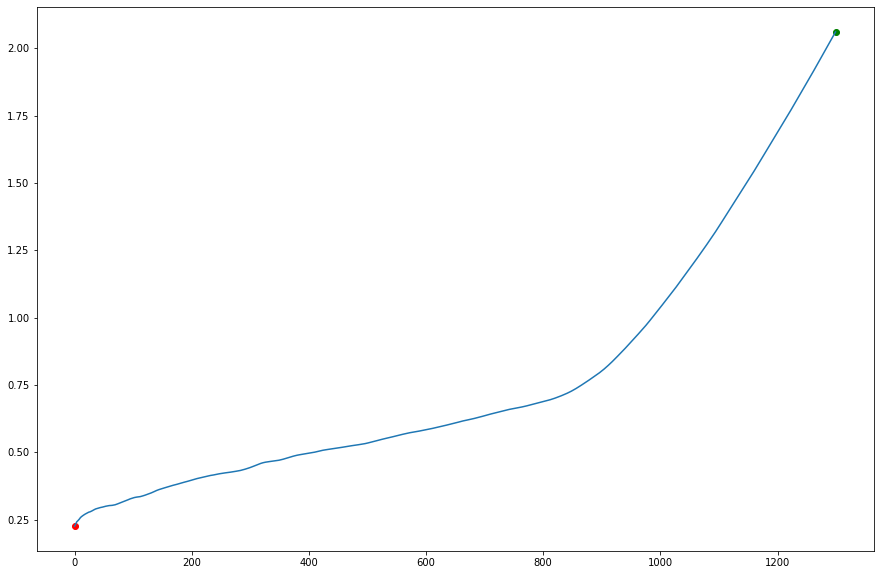

In [46]:
n=5 # number of points to be checked before and after 
# Find local peaks
vib_rms['min'] = vib_rms.iloc[argrelextrema(vib_rms.vib_rms.values, np.less_equal, order=n)[0]]['vib_rms']
vib_rms['max'] = vib_rms.iloc[argrelextrema(vib_rms.vib_rms.values, np.greater_equal, order=n)[0]]['vib_rms']

# Plot results
plt.scatter(vib_rms.index, vib_rms['min'], c='r')
plt.scatter(vib_rms.index, vib_rms['max'], c='g')
plt.plot(vib_rms.index, vib_rms['vib_rms'])
plt.show()

In [47]:
vib_rms['days'] = np.linspace(1,1300,1300)

In [48]:
cols = list(vib_rms.columns)
cols = [cols[-1]] + cols[:-1]
vib_rms = vib_rms[cols]

vib_rms.head()

,days,vib_rms,min,max
0,1.0,0.226010,0.22601,NaN
1,2.0,0.229761,NaN,NaN
2,3.0,0.234597,NaN,NaN
3,4.0,0.239069,NaN,NaN
4,5.0,0.242968,NaN,NaN


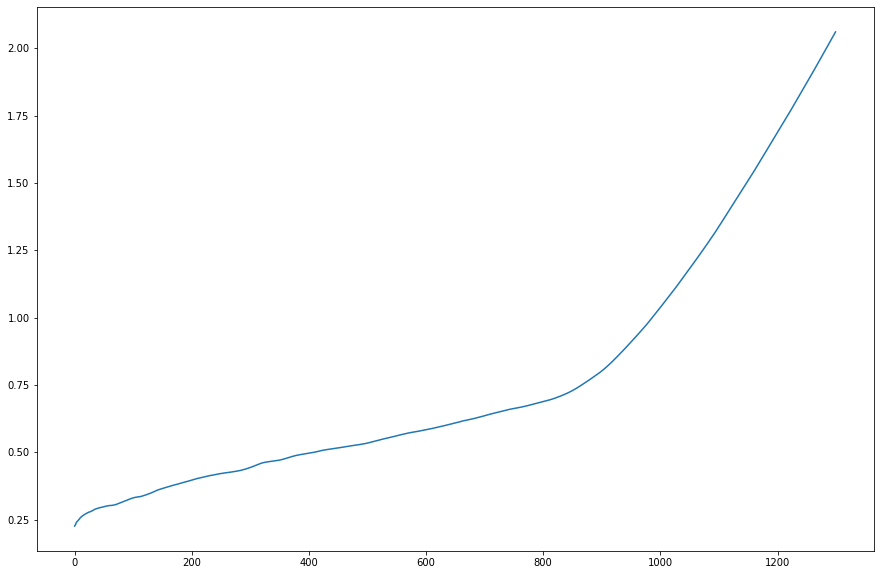

In [49]:
plt.plot(vib_rms.vib_rms)
plt.show()

In [50]:
vib_rms.index = vib_rms.index+1

In [51]:
vib_rms.head()

,days,vib_rms,min,max
1,1.0,0.226010,0.22601,NaN
2,2.0,0.229761,NaN,NaN
3,3.0,0.234597,NaN,NaN
4,4.0,0.239069,NaN,NaN
5,5.0,0.242968,NaN,NaN


In [52]:
vib_fail = vib_rms["vib_rms"].max()

In [53]:
vib_rms["vib_rms"].mean()

0.7771960603894391

In [54]:
vib_rms["vib_rms"].std()

0.4590881010438227

In [55]:
#vib_rms[vib_rms.vib_rms>vib_rms.vib_rms.quantile(0.50)]
vib_rms[vib_rms.vib_rms>vib_rms.vib_rms.mean()]

,days,vib_rms,min,max
886,886.0,0.777929,NaN,NaN
887,887.0,0.779392,NaN,NaN
888,888.0,0.780871,NaN,NaN
889,889.0,0.782352,NaN,NaN
890,890.0,0.783857,NaN,NaN
...,...,...,...,...
1296,1296.0,2.044914,NaN,NaN
1297,1297.0,2.048767,NaN,NaN
1298,1298.0,2.052621,NaN,NaN
1299,1299.0,2.056474,NaN,NaN


In [56]:
ft = vib_rms.vib_rms.mean() + vib_rms.vib_rms.std()
#ft = vib_rms.vib_rms.mean() 
print(ft)

1.2362841614332618


In [93]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sympy.solvers import solve
from sympy import Symbol, exp

n_rows = len(vib_rms)

RUL_trend_0 = []
RUL_trend_1 = []
RUL_trend_2 = []

G_Truth = []

for i in range(1, n_rows):
    x = vib_rms.iloc[0:i, 0].values
    y = vib_rms.iloc[0:i, 1].values
    
    x= x[:,np.newaxis]
    y= y[:,np.newaxis]
    
    inds = x.ravel().argsort()
    x = x.ravel()[inds].reshape(-1,1)
    y = y[inds] #Sort y according to x sorted index
    
#print(x[-30:,0])
#print(x.shape)
    

    if y[i-1] >=ft: 
        x = x[-300:, 0]
        y = y[-300:, 0]
        
        x= x[:,np.newaxis]
        y= y[:,np.newaxis]
    
        inds = x.ravel().argsort()
        x = x.ravel()[inds].reshape(-1,1)
        y = y[inds]

        polynomial_features= PolynomialFeatures(degree=3)
        xp = polynomial_features.fit_transform(x)
        
        model = sm.OLS(y, xp).fit()
        ypred = model.predict(xp) 

        df = pd.read_html(model.summary().tables[1].as_html(),header=0,index_col=0)[0]
        
        z = Symbol('z', positive = True, real = True) 
        
        
        remaining_0 = solve(df['coef'].values[0] + df['coef'].values[1]*pow(z,1) + df['coef'].values[2]*pow(z,2) 
                            + df['coef'].values[3]*pow(z,3)  - vib_fail , z)
        
        remaining_1 = solve(df['[0.025'].values[0] + df['[0.025'].values[1]*pow(z,1) + df['[0.025'].values[2]*pow(z,2) 
                            + df['[0.025'].values[3]*pow(z,3) - vib_fail , z)
        
        remaining_2 = solve(df['0.975]'].values[0] + df['0.975]'].values[1]*pow(z,1) + df['0.975]'].values[2]*pow(z,2) 
                            + df['0.975]'].values[3]*pow(z,3)  - vib_fail , z)
        
        
        '''
        remaining_0 = solve(df['coef'].values[0] + df['coef'].values[1]*pow(z,1) + df['coef'].values[2]*pow(z,2) 
                             - vib_fail , z)
        
        remaining_1 = solve(df['[0.025'].values[0] + df['[0.025'].values[1]*pow(z,1) + df['[0.025'].values[2]*pow(z,2) 
                            - vib_fail , z)
        
        remaining_2 = solve(df['0.975]'].values[0] + df['0.975]'].values[1]*pow(z,1) + df['0.975]'].values[2]*pow(z,2) 
                             - vib_fail , z)
        '''
        print(remaining_0)
        #print(remaining_1)

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


KeyboardInterrupt: 

In [84]:
        RUL_0 = remaining_0[0] - x[-1,0]
        RUL_1 = remaining_1[0] - x[-1,0]
        RUL_2 = remaining_2[0] - x[-1,0]
        
        actual = n_rows - i
        
        RUL_trend_0.append(RUL_0)
        RUL_trend_1.append(RUL_1)
        RUL_trend_2.append(RUL_2)
        
        G_Truth.append(actual)

IndexError: list index out of range

In [ ]:
#df_RUL = pd.DataFrame({'Actual': G_Truth[:],'RUL_1': RUL_trend_1[:], 'RUL_0': RUL_trend_0[:], 'RUL_2': RUL_trend_2[:]})
df_RUL = pd.DataFrame({'Actual': G_Truth[:],'RUL_0': RUL_trend_0[:]})
#df_RUL['diff'] = df_RUL.RUL - df_RUL.Actual
#df_RUL['Error(%)'] = ((df_RUL.Actual - df_RUL.RUL)/df_RUL.Actual)*100
pd.set_option('display.max_rows', df_RUL.shape[0]+1)
df_RUL

In [ ]:
df_RUL= df_RUL.astype(float)

In [ ]:
for col in df_RUL:
    plt.plot(df_RUL[col])
    
#plt.legend(loc='upper right', fancybox=True, ncol=100, labels=['Actual', 'RUL_1', 'RUL_0', 'RUL_2'])   
plt.legend(loc='upper right', fancybox=True, ncol=100, labels=['Actual', 'predicted']) 
plt.axhline(y = 0, color = 'r', linestyle = '-')
plt.show()

In [ ]:
#df_RUL = pd.DataFrame({'Actual': G_Truth[:],'RUL': RUL_trend[:]})
#df_RUL['diff'] = df_RUL.RUL - df_RUL.Actual
#df_RUL['Error(%)'] = ((df_RUL.Actual - df_RUL.RUL)/df_RUL.Actual)*100
#pd.set_option('display.max_rows', df_RUL.shape[0]+1)
#df_RUL

In [ ]:
#df_RUL= df_RUL.astype(float)
#df_RUL.info()

In [ ]:
#for col in df_RUL:
#    plt.plot(df_RUL[col])
    
#plt.legend(loc='upper right', fancybox=True, ncol=100, labels=['Actual', 'Predited'])    
#plt.axhline(y = 0, color = 'r', linestyle = '-')
#plt.show()